## **Heart Disease Prediction using Python**

Importing Libraries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

Loading the data file

In [ ]:
heart_dataset = pd.read_csv(r'/content/drive/MyDrive/heart.csv')

In [ ]:
heart_dataset.shape

(303, 14)

In [ ]:
# top 5 data rows
heart_dataset.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
'''
Attribute Information:

age
sex
cp - chest pain type (4 values)
chol - trestbps - resting blood pressure
fbs - serum cholestoral in mg/dl
restecg - fasting blood sugar > 120 mg/dl
thalach - resting electrocardiographic results (values 0,1,2) 
maximum heart rate achieved
exang - exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
slope - the slope of the peak exercise ST segment
ca - number of major vessels (0-3) colored by flourosopy
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
'''

'\nAttribute Information:\n\nage\nsex\ncp - chest pain type (4 values)\nchol - trestbps - resting blood pressure\nfbs - serum cholestoral in mg/dl\nrestecg - fasting blood sugar > 120 mg/dl\nthalach - resting electrocardiographic results (values 0,1,2) \nmaximum heart rate achieved\nexang - exercise induced angina\noldpeak = ST depression induced by exercise relative to rest\nslope - the slope of the peak exercise ST segment\nca - number of major vessels (0-3) colored by flourosopy\nthal: 3 = normal; 6 = fixed defect; 7 = reversable defect\n'

In [ ]:
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


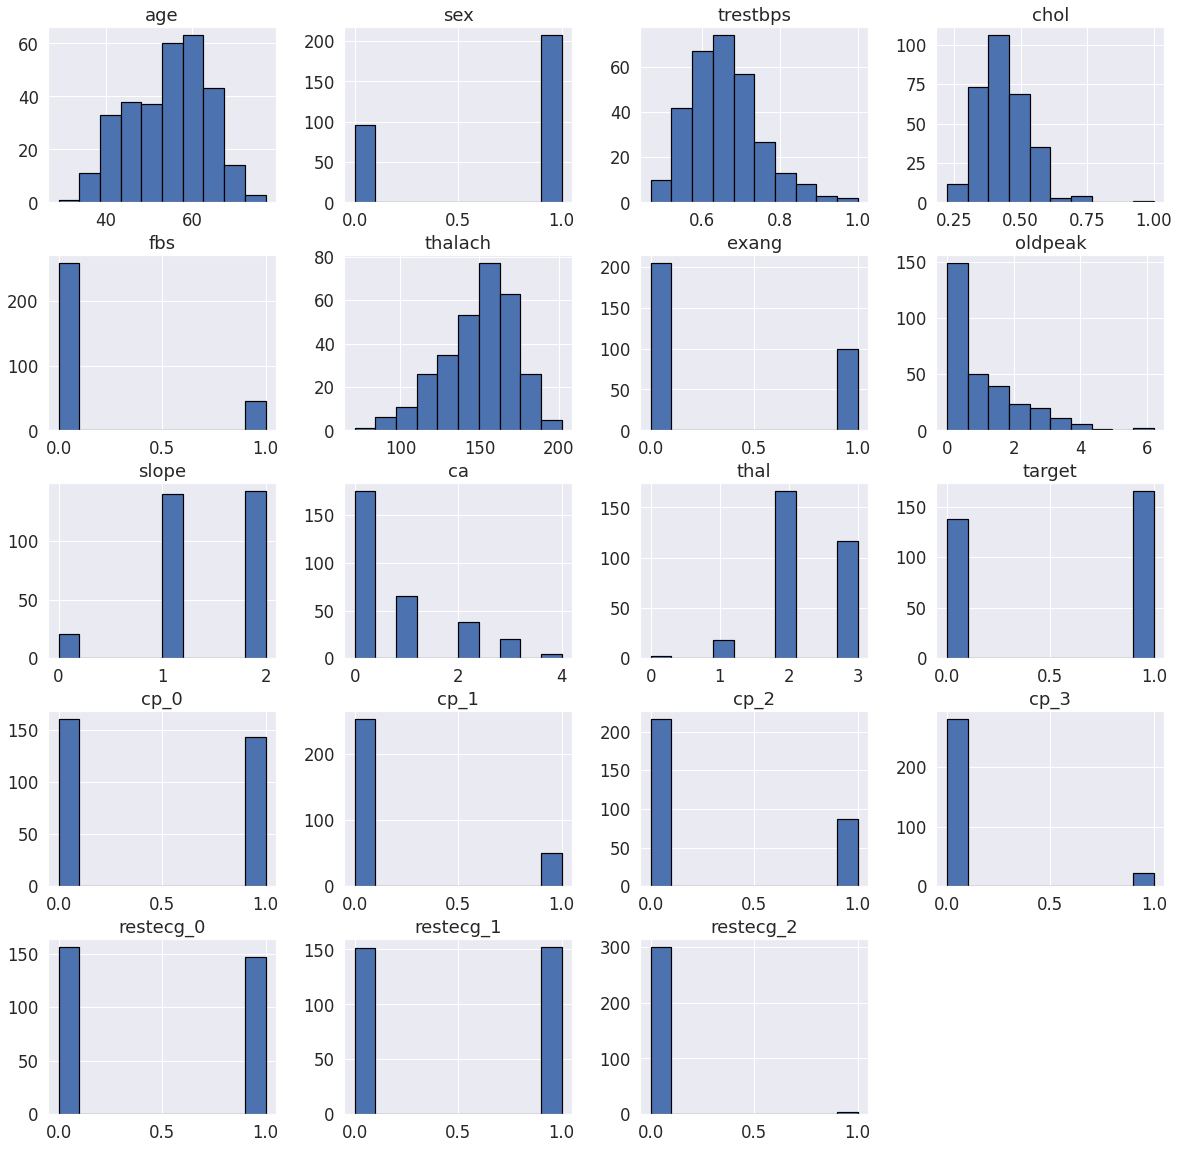

In [ ]:
sns.set(font_scale=1.5)
heart_dataset.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

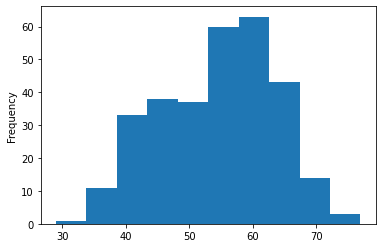

In [ ]:
heart_dataset['age'].plot.hist()

In [ ]:
heart_dataset["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

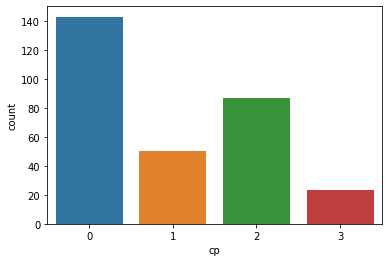

In [ ]:
# "cp:chest pain" - 4 types counts
sns.countplot(x="cp",data=heart_dataset)

In [ ]:
heart_dataset["sex"].value_counts()
# 1 - Male , 0 - Female

1    207
0     96
Name: sex, dtype: int64

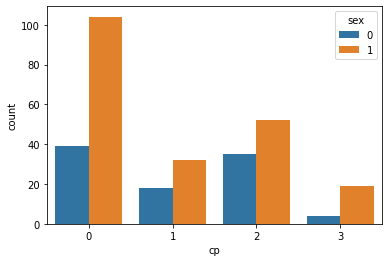

In [ ]:
# "cp:chest pain" - 4 types counts as per "sex(1-male, 0-Female)"
sns.countplot(x="cp", hue="sex",data=heart_dataset)

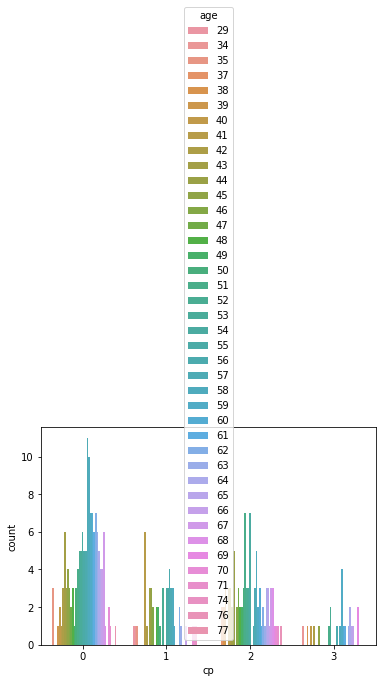

In [ ]:
# "cp:chest pain" - 4 types counts as per "age"
sns.countplot(x="cp", hue="age",data=heart_dataset)

In [ ]:
# check if any dataset contain missing values
heart_dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
heart_dataset["target"].value_counts()
# 1 - have problem ,0 - don't have

1    165
0    138
Name: target, dtype: int64

In [ ]:
heart_dataset['chol'] = heart_dataset['chol']/heart_dataset['chol'].max()
heart_dataset['chol']

0      0.413121
1      0.443262
2      0.361702
3      0.418440
4      0.627660
         ...   
298    0.427305
299    0.468085
300    0.342199
301    0.232270
302    0.418440
Name: chol, Length: 303, dtype: float64

In [ ]:
heart_dataset['trestbps']= heart_dataset['trestbps']/heart_dataset['trestbps'].max()
heart_dataset['trestbps']

0      0.725
1      0.650
2      0.650
3      0.600
4      0.600
       ...  
298    0.700
299    0.550
300    0.720
301    0.650
302    0.650
Name: trestbps, Length: 303, dtype: float64

Dummy values to convert categorial value using pandas

In [ ]:
heart_dataset = pd.get_dummies(heart_dataset,columns= ["cp","restecg"])
heart_dataset.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2
0,63,1,0.725,0.413121,1,150,0,2.3,0,0,1,1,0,0,0,1,1,0,0
1,37,1,0.650,0.443262,0,187,0,3.5,0,0,2,1,0,0,1,0,0,1,0
2,41,0,0.650,0.361702,0,172,0,1.4,2,0,2,1,0,1,0,0,1,0,0
3,56,1,0.600,0.418440,0,178,0,0.8,2,0,2,1,0,1,0,0,0,1,0
4,57,0,0.600,0.627660,0,163,1,0.6,2,0,2,1,1,0,0,0,0,1,0


In [ ]:
data_numericals = ["age","sex","trestbps","chol","thalach","oldpeak"]
categorials = list(set(heart_dataset.columns)- set(data_numericals) -{"target"})

In [ ]:
he

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'thal', 'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3',
       'restecg_0', 'restecg_1', 'restecg_2'],
      dtype='object')

In [ ]:
heart_dataset.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2
0,63,1,0.725,0.413121,1,150,0,2.3,0,0,1,1,0,0,0,1,1,0,0
1,37,1,0.650,0.443262,0,187,0,3.5,0,0,2,1,0,0,1,0,0,1,0
2,41,0,0.650,0.361702,0,172,0,1.4,2,0,2,1,0,1,0,0,1,0,0
3,56,1,0.600,0.418440,0,178,0,0.8,2,0,2,1,0,1,0,0,0,1,0
4,57,0,0.600,0.627660,0,163,1,0.6,2,0,2,1,1,0,0,0,0,1,0


In [ ]:
categorials

['restecg_2',
 'slope',
 'cp_0',
 'exang',
 'fbs',
 'thal',
 'cp_1',
 'cp_3',
 'cp_2',
 'restecg_0',
 'ca',
 'restecg_1']

In [ ]:
data_numericals

['age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak']

Splitting Data into features and target

In [ ]:
x = heart_dataset.drop(columns='target',axis=1)
y = heart_dataset['target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0)

In [ ]:
len(x_train)

242

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(242, 18) (61, 18) (242,) (61,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbour = KNeighborsClassifier(n_neighbors = 4).fit(x_train,y_train)

In [ ]:
x_preaditon = neighbour.predict(x_test)
prediction = pd.DataFrame(x_preaditon)
prediction.head()

,0
0,0
1,1
2,0
3,0
4,0


In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test, prediction)

0.7213114754098361

In [ ]:
# Now Using SVM Algorithm 
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=0)
classifier.fit(x_train,y_train)

SVC(random_state=0)

In [ ]:
#Predict
y_preaditon = classifier.predict(x_test)
prediction2 = pd.DataFrame(y_preaditon)
prediction2.head()

,0
0,0
1,1
2,1
3,0
4,1


In [ ]:
#Now check the Accuracy
metrics.accuracy_score(y_test, prediction2)

0.7049180327868853

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[25,  2],
       [15, 19]])

In [ ]:
confusion_matrix(y_test,prediction2)

array([[14, 13],
       [ 5, 29]])

In [ ]:
#Using DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
HeartTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [ ]:
HeartTree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
y_preaditon = HeartTree.predict(x_test)
prediction3 = pd.DataFrame(y_preaditon)
prediction3.head()

,0
0,0
1,0
2,0
3,0
4,0


In [ ]:
metrics.accuracy_score(y_test,prediction3)

0.7540983606557377

In [ ]:
confusion_matrix(y_test,prediction3)

array([[22,  5],
       [10, 24]])